In [1]:
import os

import numpy as np
import pandas as pd

In [2]:
regular_reviews = pd.read_csv('reg_reviews_01_NLP.csv')
not_recommended_reviews= pd.read_csv('not_reviews_NLP.csv')

In [3]:
regular_reviews['regular'] = 1
not_recommended_reviews['regular'] = 0

In [4]:
reviews = regular_reviews.append(not_recommended_reviews, ignore_index = True).dropna(axis=1)
reviews.reset_index(drop = True)
reviews.head()

,Sfreq0,Sfreq1,Sfreq2,Sfreq3,Sfreq4,Sfreq5,avgSentiment,friends,has_photo,numSentence,numWords,photos,rating,regular,restaurant_id,review,reviews,totSentiment
0,0,2,5,3,0,0,2.100000,17,True,10,82,4,5,1,55,Delicious! What a way to start our Seattle get...,56,21.0
1,0,5,0,3,1,0,2.000000,233,True,9,149,1745,4,1,55,Great little hipster stop for good food and dr...,1201,18.0
2,0,1,8,4,0,0,2.230769,536,True,13,125,1,5,1,55,Do you need an anchor? This place lives up to...,153,29.0
3,0,4,3,4,0,0,2.000000,38,True,11,98,68,5,1,55,This is the bombastic booyah of beer bars.\r\n...,87,22.0
4,0,9,1,3,0,0,1.538462,100,True,13,157,4418,5,1,55,AMAZING dining experience.\r\n\r\nMy friend an...,951,20.0


In [5]:
reviews.describe()

,Sfreq0,Sfreq1,Sfreq2,Sfreq3,Sfreq4,Sfreq5,avgSentiment,friends,numSentence,numWords,photos,rating,regular,restaurant_id,reviews,totSentiment
count,54056.000000,54056.000000,54056.000000,54056.000000,54056.000000,54056.0,54056.000000,54056.000000,54056.000000,54056.000000,54056.000000,54056.000000,54056.000000,54056.000000,54056.000000,54056.000000
mean,0.074645,2.656097,1.233240,2.322758,0.328271,0.0,2.189822,74.318096,6.615010,83.704917,110.220734,3.993710,0.499464,233.419176,77.182847,13.403933
std,0.300335,3.447901,1.846427,2.087734,0.617745,0.0,0.640732,252.690288,5.951668,90.165527,1253.738231,1.355024,0.500004,185.158859,290.971838,10.893208
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,-1.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,1.750000,0.000000,3.000000,27.000000,0.000000,4.000000,0.000000,61.000000,3.000000,6.000000
50%,0.000000,2.000000,1.000000,2.000000,0.000000,0.0,2.153846,3.000000,5.000000,55.000000,0.000000,5.000000,0.000000,194.000000,11.000000,11.000000
75%,0.000000,4.000000,2.000000,3.000000,1.000000,0.0,2.666667,54.000000,8.000000,108.000000,8.000000,5.000000,1.000000,358.000000,46.000000,17.000000
max,5.000000,44.000000,101.000000,23.000000,6.000000,0.0,4.000000,5000.000000,101.000000,1000.000000,79499.000000,5.000000,1.000000,665.000000,12345.000000,202.000000


## Data cleaning

In [6]:
# Delete empty rows w/ -1 values from 'rating' and 'reviews' features

nonEmptyRows = (reviews.rating != -1)& (reviews.reviews != -1)

reviews2 = reviews.loc[nonEmptyRows,:]
reviews2.reset_index(drop = True)
print('Deleted row amount = ', len(reviews)-len(reviews2))

Deleted row amount =  681


In [7]:
# Drop ['review', 'restaurant_id', 'Sfreq5' ] text column

reviews2 = reviews2.drop(['review','restaurant_id', 'Sfreq5'], axis = 1)

In [8]:
# Replace boolean to numerical value for 'has_photo'
reviews2.has_photo = reviews2.has_photo.astype(int)

In [9]:
# Scale sentiment frequency values(Sfreq0-4) into ratio by dividing by the total number of sentence
reviews2.loc[:, ['Sfreq0','Sfreq1','Sfreq2','Sfreq3','Sfreq4' ]] = reviews2.loc[:,['Sfreq0','Sfreq1','Sfreq2','Sfreq3','Sfreq4' ]].div(reviews2.numSentence, axis = 0)

In [10]:
reviews2.loc[reviews2.Sfreq0.isnull(), :]

,Sfreq0,Sfreq1,Sfreq2,Sfreq3,Sfreq4,avgSentiment,friends,has_photo,numSentence,numWords,photos,rating,regular,reviews,totSentiment
4101,NaN,NaN,NaN,NaN,NaN,0.0,1223,1,0,0,14131,4,1,1815,0.0
4930,NaN,NaN,NaN,NaN,NaN,0.0,12,1,0,0,23,4,1,120,0.0
19729,NaN,NaN,NaN,NaN,NaN,0.0,0,0,0,0,0,2,1,2,0.0
36622,NaN,NaN,NaN,NaN,NaN,0.0,0,0,0,0,0,5,0,2,0.0
37000,NaN,NaN,NaN,NaN,NaN,0.0,0,0,0,0,0,1,0,1,0.0
42684,NaN,NaN,NaN,NaN,NaN,0.0,486,1,0,0,1,5,0,5,0.0
43755,NaN,NaN,NaN,NaN,NaN,0.0,0,1,0,0,0,3,0,3,0.0
50806,NaN,NaN,NaN,NaN,NaN,0.0,0,1,0,0,0,1,0,12,0.0
52525,NaN,NaN,NaN,NaN,NaN,0.0,0,0,0,0,0,5,0,94,0.0
52635,NaN,NaN,NaN,NaN,NaN,0.0,0,0,0,0,0,3,0,8,0.0


In [11]:
# Replace NaN found above w/ 0
print(reviews2.isnull().sum())
reviews2 = reviews2.fillna(0)

Sfreq0          11
Sfreq1          11
Sfreq2          11
Sfreq3          11
Sfreq4          11
avgSentiment     0
friends          0
has_photo        0
numSentence      0
numWords         0
photos           0
rating           0
regular          0
reviews          0
totSentiment     0
dtype: int64


In [12]:
reviews2.loc[reviews2.Sfreq0.isnull(), :]

,Sfreq0,Sfreq1,Sfreq2,Sfreq3,Sfreq4,avgSentiment,friends,has_photo,numSentence,numWords,photos,rating,regular,reviews,totSentiment


In [13]:
reviews2.describe()

,Sfreq0,Sfreq1,Sfreq2,Sfreq3,Sfreq4,avgSentiment,friends,has_photo,numSentence,numWords,photos,rating,regular,reviews,totSentiment
count,53375.000000,53375.000000,53375.000000,53375.000000,53375.000000,53375.000000,53375.000000,53375.000000,53375.000000,53375.000000,53375.000000,53375.000000,53375.000000,53375.000000,53375.000000
mean,0.010825,0.337357,0.169793,0.412136,0.069683,2.192084,75.040712,0.684122,6.677021,84.618960,111.202098,4.053096,0.493077,78.080375,13.530361
std,0.058576,0.275135,0.202150,0.294787,0.159458,0.644092,253.849342,0.464869,5.953583,90.235284,1261.312790,1.248325,0.499957,292.605187,10.885557
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.200000,0.000000,1.750000,0.000000,0.000000,3.000000,27.000000,0.000000,4.000000,0.000000,4.000000,7.000000
50%,0.000000,0.333333,0.125000,0.384615,0.000000,2.166667,3.000000,1.000000,5.000000,56.000000,0.000000,5.000000,0.000000,11.000000,11.000000
75%,0.000000,0.500000,0.272727,0.600000,0.058824,2.666667,55.000000,1.000000,8.000000,109.000000,8.000000,5.000000,1.000000,47.000000,17.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,5000.000000,1.000000,101.000000,1000.000000,79499.000000,5.000000,1.000000,12345.000000,202.000000


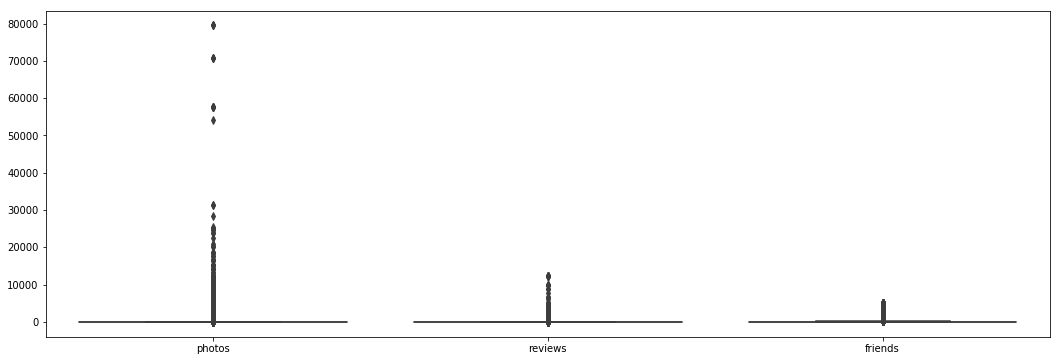

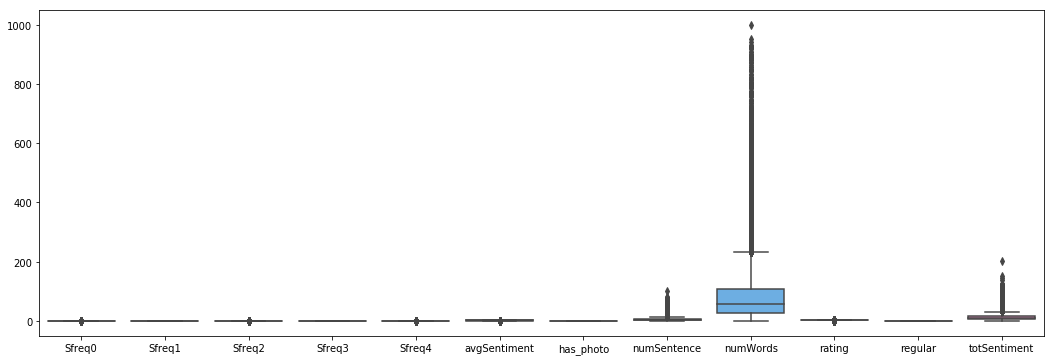

In [14]:
# Box Plot
import matplotlib.pyplot as plt
import seaborn as sns  

plt.figure(figsize = (18,6))
sns.boxplot(data = reviews2.loc[:, ['photos', 'reviews', 'friends']])
plt.show()

plt.figure(figsize = (18,6))
df1 = reviews2.drop(['photos', 'reviews', 'friends'], axis = 1)
sns.boxplot(data = df1)
plt.show()

## Dataset size

In [15]:
reviews2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53375 entries, 0 to 54055
Data columns (total 15 columns):
Sfreq0          53375 non-null float64
Sfreq1          53375 non-null float64
Sfreq2          53375 non-null float64
Sfreq3          53375 non-null float64
Sfreq4          53375 non-null float64
avgSentiment    53375 non-null float64
friends         53375 non-null int64
has_photo       53375 non-null int32
numSentence     53375 non-null int64
numWords        53375 non-null int64
photos          53375 non-null int64
rating          53375 non-null int64
regular         53375 non-null int64
reviews         53375 non-null int64
totSentiment    53375 non-null float64
dtypes: float64(7), int32(1), int64(7)
memory usage: 6.3 MB


## feature description needed somewhere

In [16]:
list(reviews2)

['Sfreq0',
 'Sfreq1',
 'Sfreq2',
 'Sfreq3',
 'Sfreq4',
 'avgSentiment',
 'friends',
 'has_photo',
 'numSentence',
 'numWords',
 'photos',
 'rating',
 'regular',
 'reviews',
 'totSentiment']

In [17]:
dfX = reviews2.drop('regular', axis = 1)
dfY = reviews2.regular

print('dfX shape = ', dfX.shape)
print('dfY shape = ', dfY.shape)

dfX shape =  (53375, 14)
dfY shape =  (53375,)


## Feature Importance

In [18]:
# Feature Importance w/ multiple classification algorithms
import time
t = time.time()  # Check Calculation Time

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier


# data frame info
X0= preprocessing.scale(dfX.as_matrix())   # standardize dataset; center to mean & scale to unit variance
y0 = dfY.as_matrix()
col_x_list = list(dfX)
samplePercent = 100   # 0-100%; sample amount will be used for this feature ranking process


# classifier info
names = [ "Decision Tree", "Random Forest", "AdaBoost", "Extra Random Trees", "Boosted Tree"]
random_state = 1
classifiers = [
    DecisionTreeClassifier(random_state =random_state),
    RandomForestClassifier(random_state =random_state),
    AdaBoostClassifier(random_state =random_state),
    ExtraTreesClassifier(random_state =random_state),
    GradientBoostingClassifier(random_state =random_state)]



# Sampling info
np.random.seed(1)
sampleRow = np.random.choice(len(X0), int(len(X0)*samplePercent/100)) # samples row numbers

X = X0[sampleRow,:] 
y = y0[sampleRow]

                        
# train/fit
k = 0

model_score = np.zeros((X.shape[1],len(classifiers)))

for name, clf in zip(names, classifiers):
    
    # training
    clf.fit(X, y)

    # feature importance score
    score = pd.DataFrame({'Attribute': col_x_list, 'Importance': clf.feature_importances_})
    # Add Rank
    score[name] = score['Importance'].rank(ascending = 0)
    
    # Importance Rank Collection
    model_score[:, k] = score.ix[:,2] # Collect prediction outputs
#     print (name, acc.mean())
    k += 1
    

feature_importance = pd.DataFrame(model_score)
feature_importance.columns = names
feature_importance['Features'] = col_x_list
feature_importance['Rank Average'] = feature_importance.mean(axis = 1)

# Final Rank
feature_importance['Total Rank'] = feature_importance['Rank Average'].rank(ascending = 1)
feature_importance_sort = feature_importance.sort_values(by = 'Total Rank', axis = 0, ascending = True)
feature_importance_sort = feature_importance_sort.reset_index(drop = True)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(feature_importance_sort.ix[:,(5,0,1,2,3,4)])

elapsed = time.time() - t
print('Elapsed time is ', round(elapsed/60, 1), ' minutes')

C:\Users\ML\Anaconda3\lib\site-packages\ipykernel_launcher.py:59: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
C:\Users\ML\Anaconda3\lib\site-packages\ipykernel_launcher.py:59: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
C:\Users\ML\Anaconda3\lib\site-packages\ipykernel_launcher.py:59: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
C:\Users\ML\Anaconda3\lib\site-packages\ipykernel_launcher.py:59: DeprecationWarning: 
.ix is deprecated. Please use
.loc fo

        Features  Decision Tree  Random Forest  AdaBoost  Extra Random Trees  \
0        reviews            1.0            1.0       1.0                 1.0   
1       numWords            2.0            2.0       2.0                 2.0   
2        friends            3.0            3.0       4.0                 3.0   
3         photos            4.0            4.0       3.0                 4.0   
4   totSentiment            5.0            6.0       8.5                 8.0   
5         Sfreq1            8.0            8.0       5.0                 6.0   
6    numSentence           11.0            5.0       6.0                 7.0   
7         rating           10.0           10.0       8.5                10.0   
8         Sfreq3            7.0            9.0       8.5                 9.0   
9   avgSentiment            6.0            7.0      12.5                11.0   
10        Sfreq2            9.0           11.0      12.5                12.0   
11     has_photo           13.0         

C:\Users\ML\Anaconda3\lib\site-packages\ipykernel_launcher.py:74: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


In [19]:
# Final Rank
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(feature_importance_sort.ix[:,5:8])

        Features  Rank Average  Total Rank
0        reviews           1.0         1.0
1       numWords           2.0         2.0
2        friends           3.2         3.0
3         photos           3.8         4.0
4   totSentiment           6.7         5.0
5         Sfreq1           7.0         6.0
6    numSentence           7.2         7.0
7         rating           8.7         8.0
8         Sfreq3           8.9         9.0
9   avgSentiment           9.3        10.0
10        Sfreq2          10.7        11.0
11     has_photo          11.5        12.0
12        Sfreq4          12.3        13.0
13        Sfreq0          12.7        14.0


In [20]:
# sort dataFrame w/ the order of feature importance
featureRank = feature_importance_sort.ix[:,5]
reviews3 = reviews2.loc[:,featureRank]
reviews3 = pd.concat([dfY,reviews3], axis = 1)

## Correlation

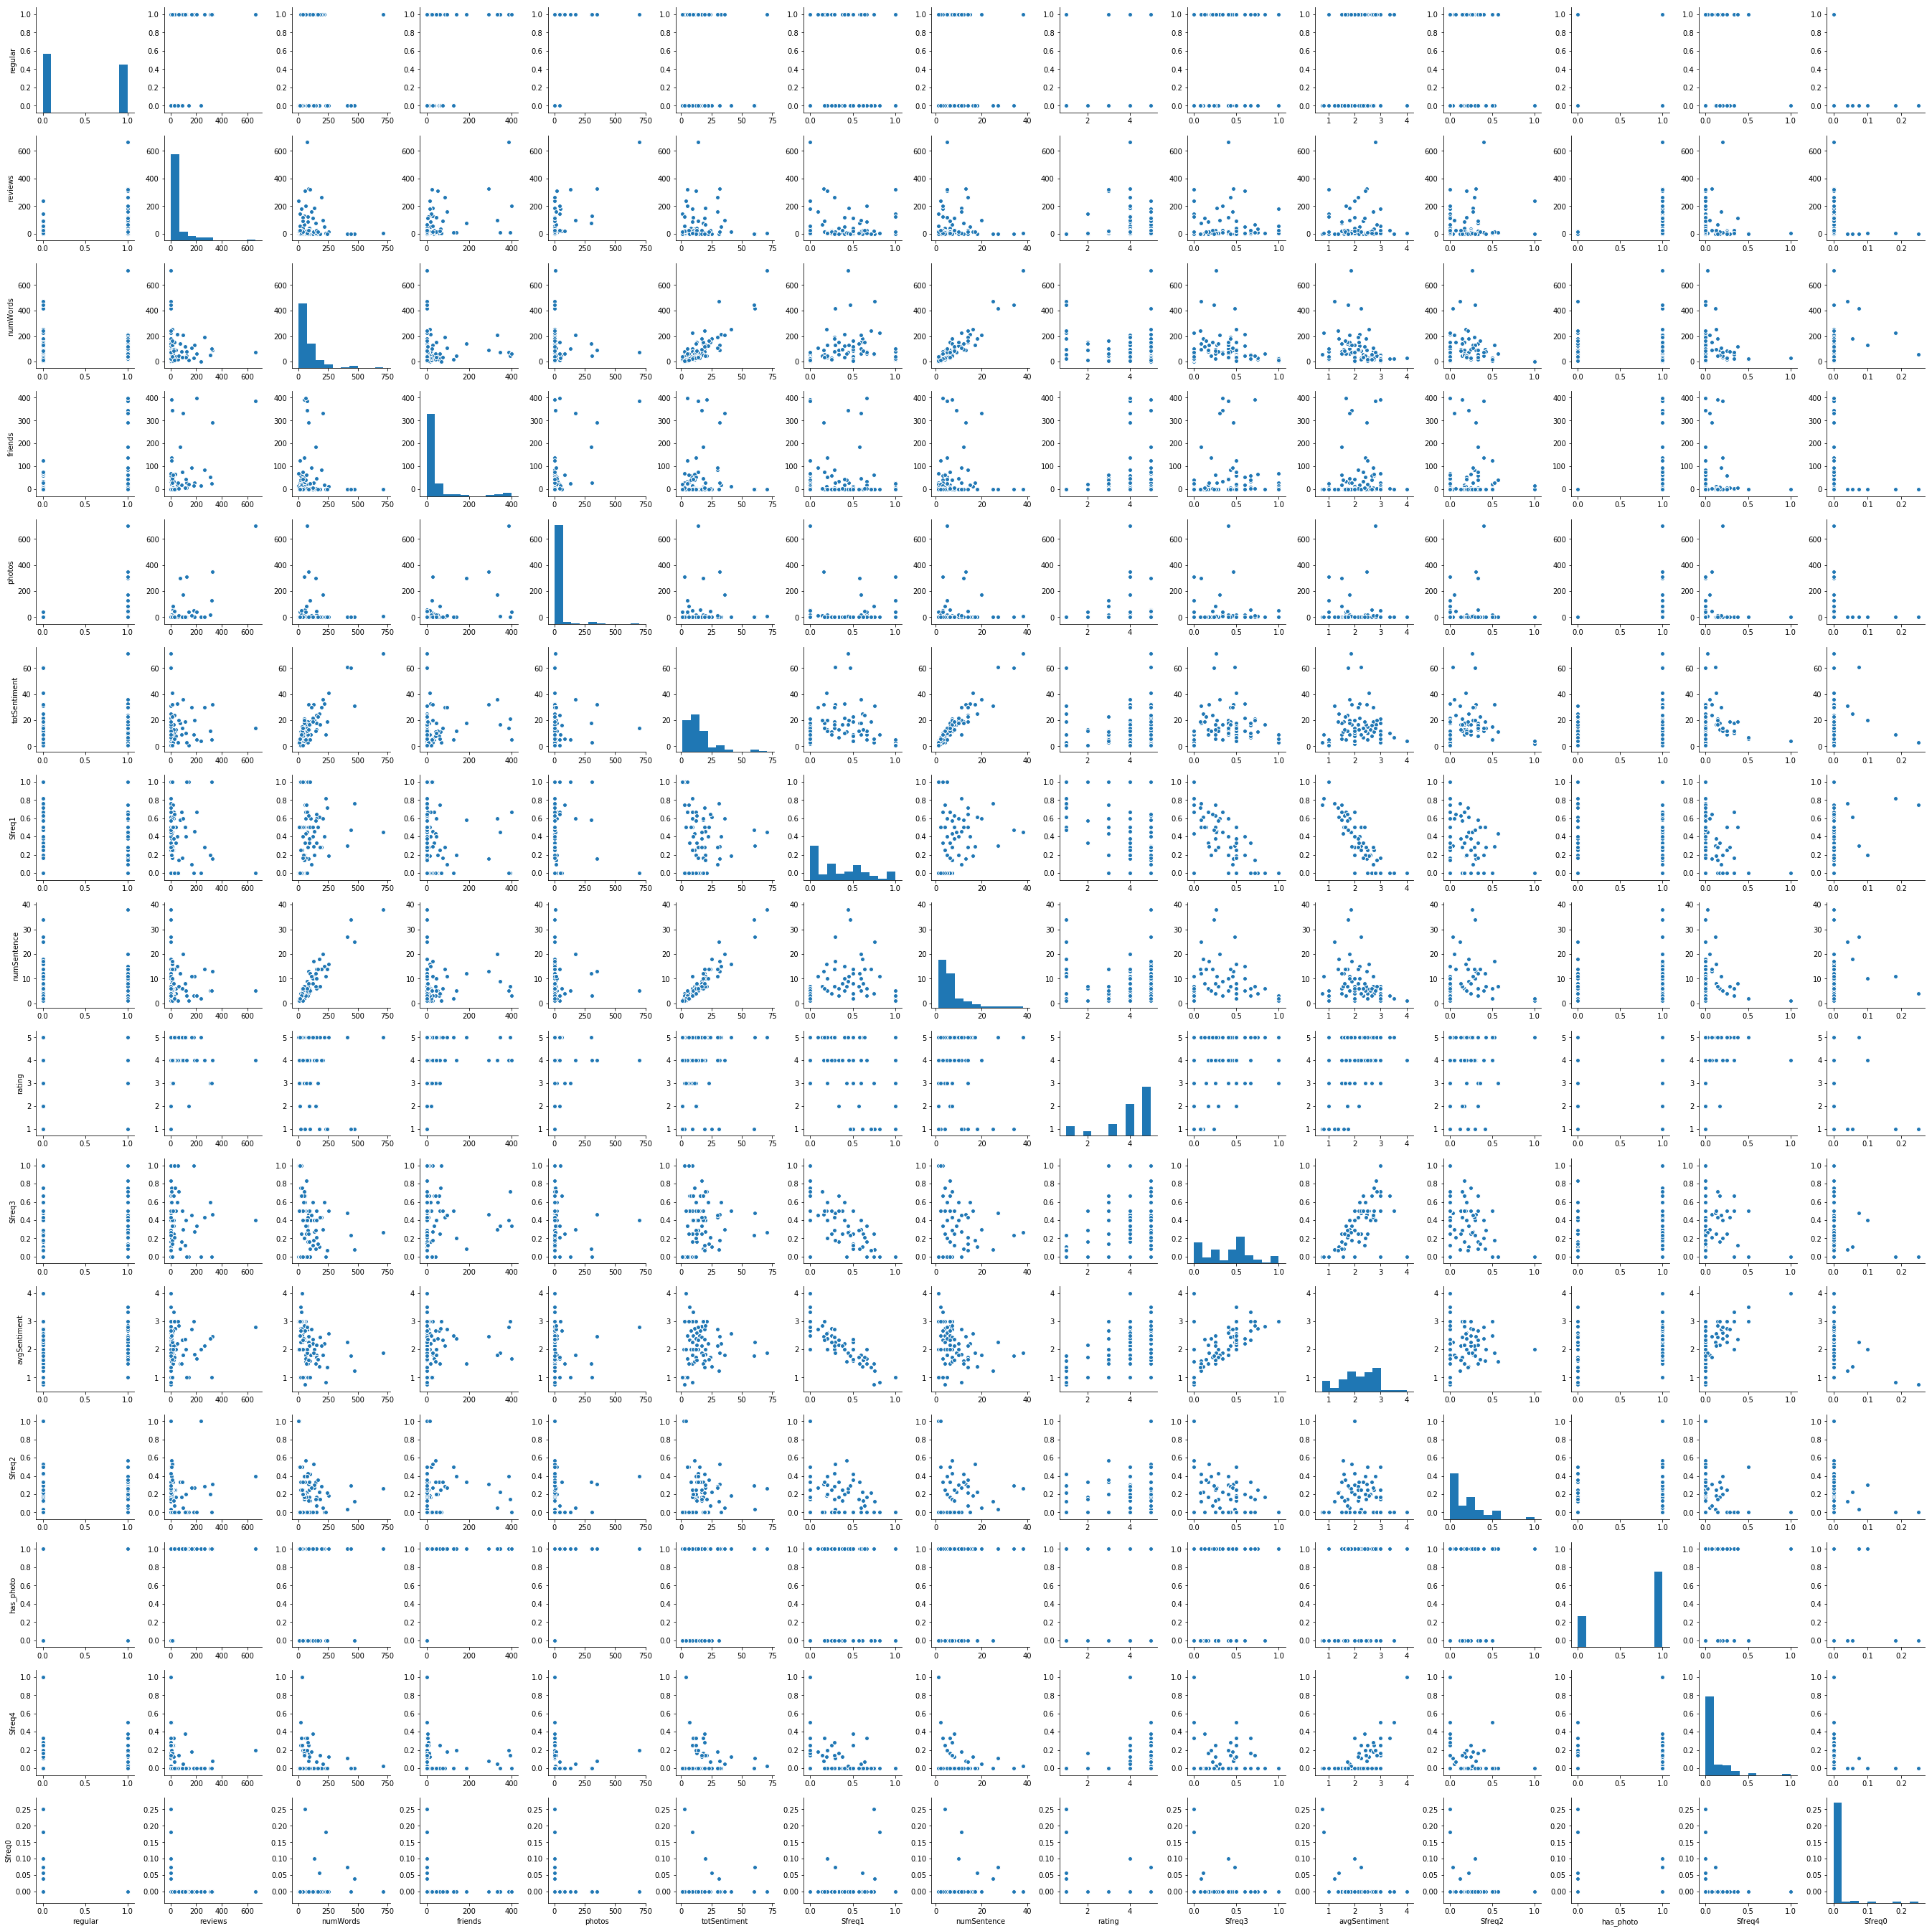

In [21]:
# Scatter Matrix
import seaborn as sns  

# sample values only for scatter plot
sample_scatter = reviews3.sample(n = 100, random_state = 0, axis = 0)

sns.pairplot(sample_scatter, palette = 'hls')
plt.show()

<span style="color:blue">  
    This scatter plot is for just glancing throught data distribution.  Can see some collinearities among predictors.      
</span>

In [22]:
# corr.coef
reviews3.corr()

,regular,reviews,numWords,friends,photos,totSentiment,Sfreq1,numSentence,rating,Sfreq3,avgSentiment,Sfreq2,has_photo,Sfreq4,Sfreq0
regular,1.000000,0.211582,0.246335,0.167472,0.079484,0.239154,0.173320,0.252579,-0.056629,-0.110596,-0.168961,-0.011304,0.239848,-0.084874,0.014098
reviews,0.211582,1.000000,0.160070,0.563384,0.455023,0.139482,0.080140,0.154665,-0.027251,-0.058172,-0.085753,0.010694,0.142302,-0.047286,0.006698
numWords,0.246335,0.160070,1.000000,0.175362,0.112256,0.819713,0.342291,0.909028,-0.204475,-0.252170,-0.340692,-0.013263,0.072233,-0.133642,0.074180
friends,0.167472,0.563384,0.175362,1.000000,0.392201,0.164315,0.056997,0.171802,0.009034,-0.043280,-0.060233,0.008749,0.167170,-0.030947,0.003017
photos,0.079484,0.455023,0.112256,0.392201,1.000000,0.082368,0.036128,0.091782,-0.011392,-0.027230,-0.041852,-0.000641,0.056216,-0.019687,0.019863
totSentiment,0.239154,0.139482,0.819713,0.164315,0.082368,1.000000,0.054671,0.946950,0.008496,-0.059715,-0.058707,0.060530,0.092379,-0.038438,-0.056157
Sfreq1,0.173320,0.080140,0.342291,0.056997,0.036128,0.054671,1.000000,0.264305,-0.454488,-0.650885,-0.858221,-0.202782,-0.005687,-0.267006,0.009547
numSentence,0.252579,0.154665,0.909028,0.171802,0.091782,0.946950,0.264305,1.000000,-0.165247,-0.229731,-0.288488,0.084488,0.077888,-0.140358,0.009143
rating,-0.056629,-0.027251,-0.204475,0.009034,-0.011392,0.008496,-0.454488,-0.165247,1.000000,0.399149,0.519948,-0.080898,0.087081,0.218951,-0.189156
Sfreq3,-0.110596,-0.058172,-0.252170,-0.043280,-0.027230,-0.059715,-0.650885,-0.229731,0.399149,1.000000,0.680883,-0.396709,0.017600,-0.166721,-0.147474


<span style="color:blue">  
    Attributes showing corr.coef higher than 0.2: 
    - 'numSentence'
    - 'numWords'
    - 'has_photo'
    - 'totSentiment'
    - 'reviews'
</span>

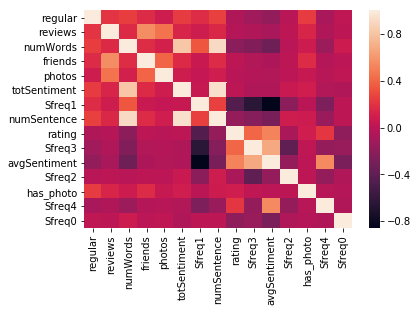

In [23]:
# Heatmap for the correlation coefficients
corr = reviews3.corr()
sns.heatmap(corr,xticklabels=corr.columns.values, yticklabels=corr.columns.values)
plt.show()

<span style="color:blue">  
    'numSentence' and 'totSentiment' are highly correlated since the 'totSentiment' is the sum of sentiment values from all sentences. 'totSentiment' is redundant so it needs to be removed.  
    'numSentence' and 'numWords' are also highly correlated.
    'avgSentiment' is higly negatively correlated w/ 'Sfreq1'(ratio of negative reveiw sentence) and
    'avgSentiment' is positively correltated w/ 'Sfreq3'&'Sfreq4'(ratio of positive review sentence)
</span>

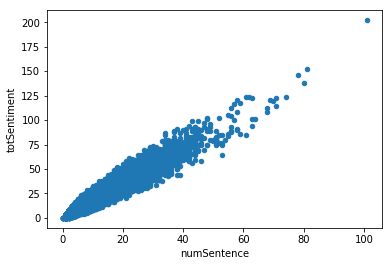

In [24]:
reviews3.loc[:, ['numSentence', 'totSentiment']].plot(x = 'numSentence', y = 'totSentiment', kind = 'scatter')
plt.show()

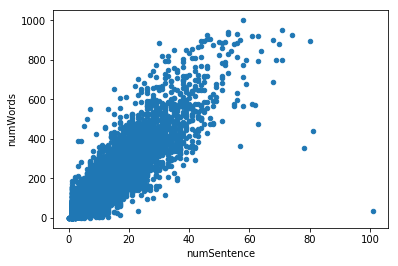

In [25]:
reviews3.loc[:, ['numSentence', 'numWords']].plot(x = 'numSentence', y = 'numWords', kind = 'scatter')
plt.show()

<span style="color:blue">  
    Some odd cases have more number of sentences than the number of words.
</span>

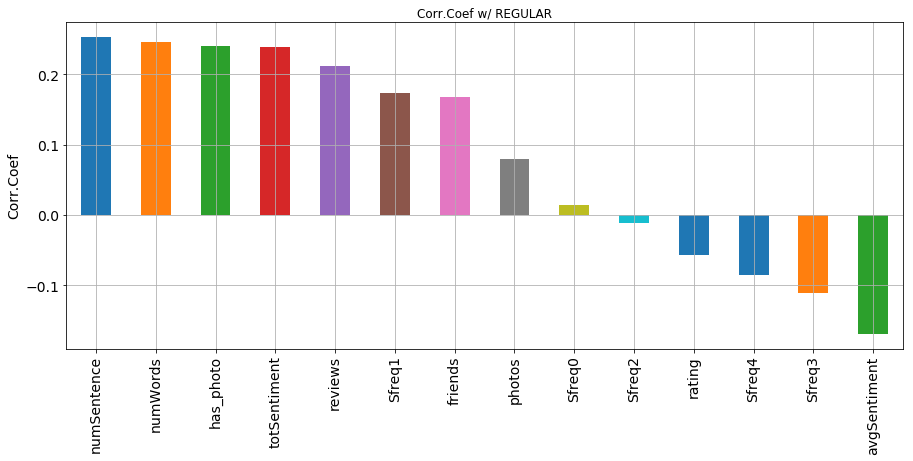

In [26]:
# Correlation w/ 'REGULAR' variable
cor = corr.iloc[1:len(corr),0]

plt.figure(figsize = (15,6))
cor.sort_values(ascending = False).plot(kind = 'bar', grid = 1, title ='Corr.Coef w/ REGULAR')

plt.ylabel('Corr.Coef', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()

<span style="color:blue">  
    Top 5 attributes correlated w/ 'regular'
</span>
- 'numSentence'
- 'numWords'
- 'has_photo'
- 'reviews'
- 'avgSentiment'

 Sentiment value meaning = {0: Very Negative, 1 : Negative, 2 : Neutral, 3 : Positive, 4: Very Positive}

## <span style="color:black"> Multicollinearity  </span>

<span style="color:black"> Collinearity may affect the regression task. ** However, if the abs(coefficient of correlation) is close to 1, it is definitely a redundant feature in a model.**  
    
Below scatter matrix allows to check correlations visually. The scatter plots looking like a straight line show the redundancy in features. </span>

In [27]:
# Identifying highly correlated attributes

corr = dfX.corr()
HighCorr = corr > .85  # Enter desired corr.coef value as a limit

result = pd.melt(HighCorr.reset_index(), id_vars=['index'])
mask = result['value'] == True
result = result.loc[mask, ['index', 'variable']]
result.columns = [0, 1]
# print(result)

HighCorr_var = result.loc[result.loc[:,0] != result.loc[:,1] ,:]
print('Highly correlated variables : \n',HighCorr_var)
HighCorr_varList = HighCorr_var.loc[:,0]
HighCorr_varList = HighCorr_varList.drop_duplicates()
# print(HighCorr_varList)

Highly correlated variables : 
                 0             1
121      numWords   numSentence
125  totSentiment   numSentence
134   numSentence      numWords
190   numSentence  totSentiment


### Above correlated values can be removed by using the feature importance rank.  If two variables are highly correlated, the feature that is less important to the dependent variable will be removed.

In [28]:
# drop 'totSentiment' column
reviews3 = reviews3.drop('totSentiment', axis = 1)
dfX = dfX.drop('totSentiment', axis = 1)

## Chi-Square Independence Test

#### Categorical variables are tested to see if there is a significant association with 'regular' values. Attributes are sorted by p-value so the top attributes have more association with 'churn' values. 

In [29]:
## Input dataFrame

df = reviews3.loc[:,['regular','has_photo','rating','avgSentiment']]
df.avgSentiment = round(df.avgSentiment*2)/2    # avgSentiment values are rounded to the nearest 0.5
# df.describe()
df.applymap(str)
col_list_obj = list(df)
obj_len = len(col_list_obj) # number of object attributes

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53375 entries, 0 to 54055
Data columns (total 4 columns):
regular         53375 non-null int64
has_photo       53375 non-null int32
rating          53375 non-null int64
avgSentiment    53375 non-null float64
dtypes: float64(1), int32(1), int64(2)
memory usage: 1.8 MB


In [31]:
# Chi-Square Test to check the independence from 'regular'
# Output: Attribute name, chi-squrare value, p-values

import scipy.stats as scs
from scipy.stats import chi2_contingency


## chi-square test

def chisq_of_df_cols(df, c1, c2):
    groupsizes = df.groupby([c1, c2]).size()
    ctsum = groupsizes.unstack(c1)
    # fillna(0) is necessary to remove any NAs which will cause exceptions
    return(chi2_contingency(ctsum.fillna(0)))

chi2_value = np.zeros(obj_len)  # prep for chi2 value output
p_value = np.zeros(obj_len)     # prep for p-value output

# Collecting Chi-square test p-values for all categorical attributes
for i in range(1,obj_len):
    chiOut = chisq_of_df_cols(df, 'regular', col_list_obj[i])
    chi2_value[i] = chiOut[0]
    p_value[i] = chiOut[1]

    
## Print Attribute name and Chi-square/p-values in a ascending order
Chi2_Result = pd.DataFrame({'Attribute' :col_list_obj,'chi-square':chi2_value,'p-value':p_value})
Chi2_Result = Chi2_Result.sort_values(by = 'p-value', axis = 0, ascending = True)
Chi2_Result = Chi2_Result.reset_index(drop = True)
print(Chi2_Result)

# Source of def "chisq_of_df_cols" <https://codereview.stackexchange.com/questions/96761/chi-square-independence-test-for-two-pandas-df-columns>

      Attribute   chi-square        p-value
0       regular     0.000000   0.000000e+00
1     has_photo  3069.466132   0.000000e+00
2  avgSentiment  2703.055673   0.000000e+00
3        rating  1347.643668  1.556270e-290


In [32]:
# checking w/ another chi-square test code
# ref: <https://codereview.stackexchange.com/questions/96761/chi-square-independence-test-for-two-pandas-df-columns>
import pandas as pd
import scipy.stats as scs

def categories(series):
    return range(int(series.min()), int(series.max()) + 1)

def chi_square_of_df_cols(df, col1, col2):
    df_col1, df_col2 = df[col1], df[col2]
    cats1, cats2 = categories(df_col1), categories(df_col2)

    def aux(is_cat1):
        return [sum(is_cat1 & (df_col2 == cat2))
                for cat2 in cats2]

    result = [aux(df_col1 == cat1)
              for cat1 in cats1]

    return scs.chi2_contingency(result)

print(chi_square_of_df_cols(df, 'regular', 'has_photo'))

(3069.4661321912718, 0.0, 1, array([[  8546.71700234,  18510.28299766],
       [  8313.28299766,  18004.71700234]]))


<span style="color:blue">  
    Chi-Squre Independence Test Result
</span>

Under the test assumptions:
1. Expected frequency for each cell of a contingency table is greater than 5.
2. Samples are independent

<span style="color:blue">  
    This independence test is performed to check the association between 'regular' and each categorical attributes. The null hypothesis is that the 'regular' is independent from another test attribute.  
    **All categorical attributes ( 'has_photo','rating','avgSentiment') showed very small p-values which reject the independence from 'regular' attribute. **
</span>

## Logistic regression


Accuracy: 
 0.723
Confusion: 
 [[4593  859]
 [2096 3127]]


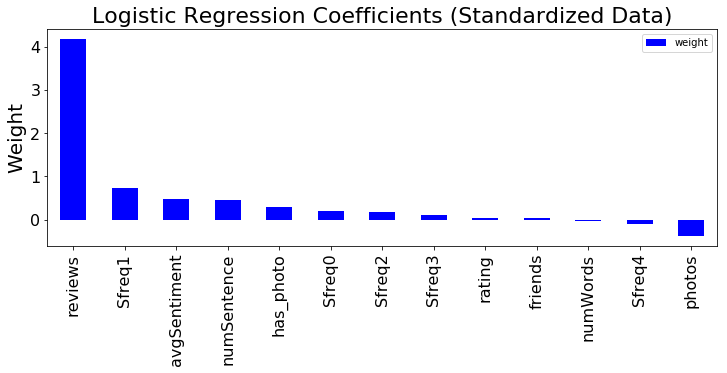


Accuracy: 
 0.719
Confusion: 
 [[4545  825]
 [2176 3129]]


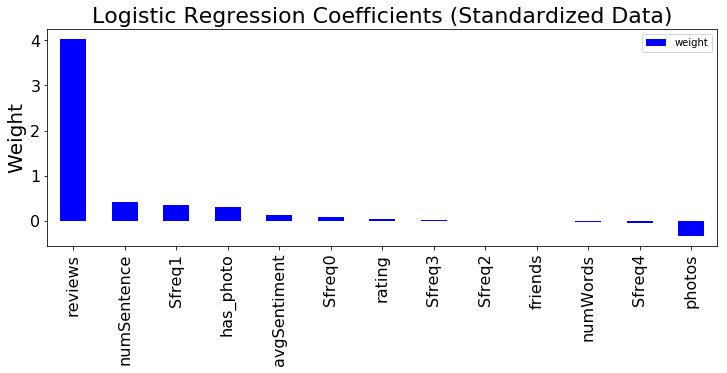


Accuracy: 
 0.722
Confusion: 
 [[4549  825]
 [2142 3159]]


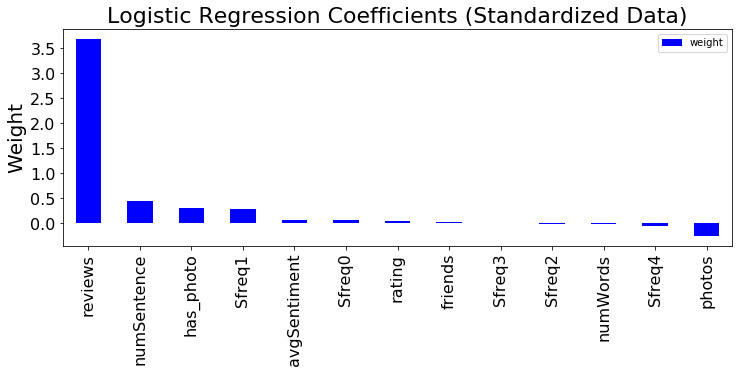

In [33]:
# import libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import ShuffleSplit
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
from sklearn import metrics as mt


# define predictor and outcome variables
X = dfX.as_matrix()
y = dfY.as_matrix()

# define cv_object
num_cv_iterations = 3
num_instances = len(y)
cv_object = ShuffleSplit(n_splits=num_cv_iterations,
                         test_size  = 0.2,
                        random_state = 0)

model_score = np.zeros((num_cv_iterations, 1, 5))

for train_indices, test_indices in cv_object.split(X,y): 

    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]
    
    scl_obj = StandardScaler()  # standardization obj
    scl_obj.fit(X_train) 

    X_train_scaled = scl_obj.transform(X_train) # apply standardization
    X_test_scaled = scl_obj.transform(X_test) 

    # train the model  
    clf = LogisticRegression(C = 1, penalty = 'l2', random_state = 0)
    clf.fit(X_train_scaled, y_train)

    # print results
    y_hat = clf.predict(X_test_scaled) # get test set precitions
    acc = mt.accuracy_score(y_test,y_hat)
    conf = mt.confusion_matrix(y_test,y_hat)
    
    print('\nAccuracy: \n', round(acc,3) )
    print('Confusion: \n', conf)
    coef_norm = clf.coef_


    # plot weight of predictors
    col_name = list(dfX)
    coef_norm1 = pd.DataFrame(coef_norm[0], index = col_name, columns = ['weight'])


    coef_norm1.sort_values('weight', ascending = False).plot(kind = 'bar', color='blue', figsize = (12,4))
    plt.title('Logistic Regression Coefficients (Standardized Data)', size = 22)
#     plt.xlabel('Predictors', size = 20)
    plt.ylabel('Weight', size = 20)
    plt.xticks(size = 16)
    plt.yticks(size = 16)

    plt.show()

## Support Vector Classification


Accuracy: 
 0.712
Confusion: 
 [[4919  533]
 [2545 2678]]


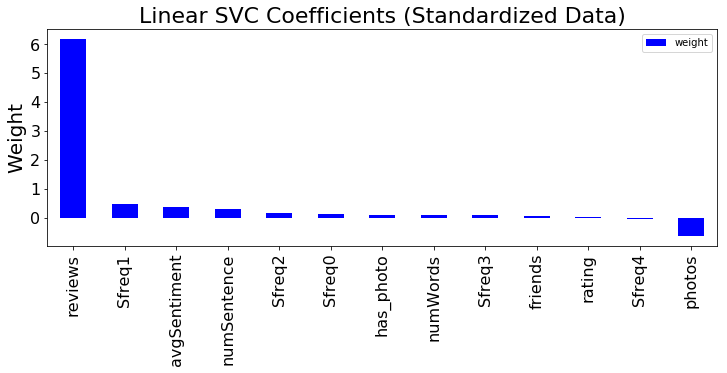


Accuracy: 
 0.703
Confusion: 
 [[4879  491]
 [2678 2627]]


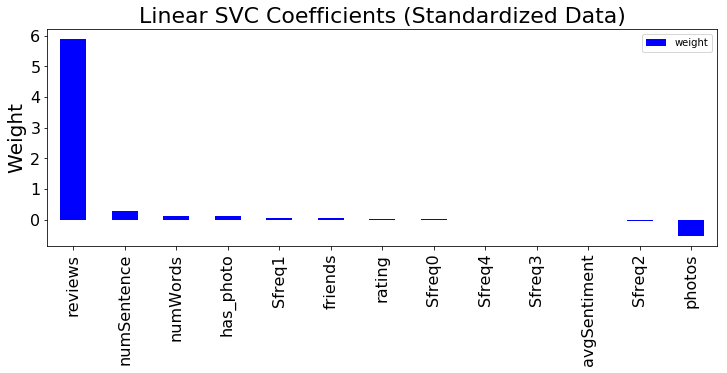


Accuracy: 
 0.714
Confusion: 
 [[4911  463]
 [2590 2711]]


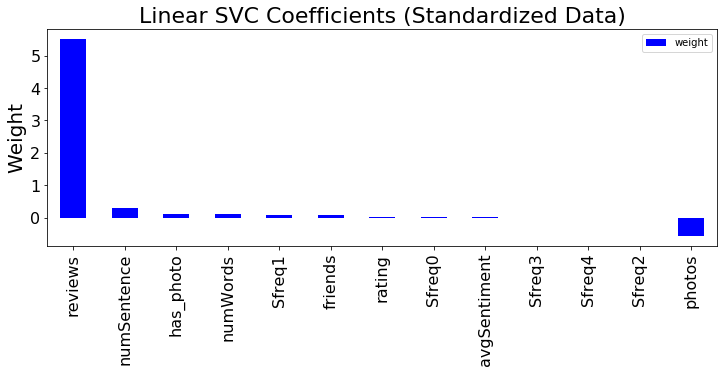

In [34]:
# SVC

# import libraries
# from sklearn.svm import SVC
from sklearn.svm import LinearSVC

for train_indices, test_indices in cv_object.split(X,y): 

    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]
    
    scl_obj = StandardScaler()  # standardization obj
    scl_obj.fit(X_train) 

    X_train_scaled = scl_obj.transform(X_train) # apply standardization
    X_test_scaled = scl_obj.transform(X_test) 

    # train the model  
#     clf = SVC(kernel = 'rbf', C = 1, random_state = 0)
    clf = LinearSVC(loss = 'hinge', random_state = 0)
    clf.fit(X_train_scaled, y_train)

    # print results
    y_hat = clf.predict(X_test_scaled) # get test set precitions
    acc = mt.accuracy_score(y_test,y_hat)
    conf = mt.confusion_matrix(y_test,y_hat)
    
    print('\nAccuracy: \n', round(acc,3) )
    print('Confusion: \n', conf)
    coef_norm = clf.coef_


    # plot weight of predictors
    col_name = list(dfX)
    coef_norm1 = pd.DataFrame(coef_norm[0], index = col_name, columns = ['weight'])

    coef_norm1.sort_values('weight', ascending = False).plot(kind = 'bar', color='blue', figsize = (12,4))
    plt.title('Linear SVC Coefficients (Standardized Data)', size = 22)
    plt.ylabel('Weight', size = 20)
    plt.xticks(size = 16)
    plt.yticks(size = 16)

    plt.show()